In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
path_train=r'F:\Data_science_with_python\ML_from_pluralsight\titanic_data_set\train.csv'
path_test=r'F:\Data_science_with_python\ML_from_pluralsight\titanic_data_set\test.csv'

In [3]:
path_train

'F:\\Data_science_with_python\\ML_from_pluralsight\\titanic_data_set\\train.csv'

In [4]:
data_train=pd.read_csv(path_train, index_col='PassengerId')
data_test=pd.read_csv(path_test, index_col='PassengerId')

In [5]:
data_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [6]:
data_test_with_survived=pd.read_csv(path_test, index_col='PassengerId')
data_test_with_survived['Survived']=-999
data_train_test=pd.concat((data_train, data_test_with_survived), sort=True)

In [7]:
data_train_test.iloc[3:5,3:5]

,Fare,Name
PassengerId,,
4,53.10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,8.05,"Allen, Mr. William Henry"


In [8]:
%Matplotlib Inline


UsageError: Line magic function `%Matplotlib` not found.


In [9]:
%matplotlib Inline

In [10]:
data_train_test.dtypes

Age         float64
Cabin        object
Embarked     object
Fare        float64
Name         object
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
Survived      int64
Ticket       object
dtype: object

In [11]:
data_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [12]:
data_train_test.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [16]:
male_passangers=data_train_test.loc[data_train_test.Sex == 'male']
print(len(male_passangers))
print(type(male_passangers))

843
<class 'pandas.core.frame.DataFrame'>


In [17]:
male_passangers_first_class=data_train_test.loc[((data_train_test.Sex == 'male') & (data_train_test.Pclass == 1))]
print(len(male_passangers_first_class))

179


In [21]:
data_train_test.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-318.747135,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,466.107167,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-999.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-999.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


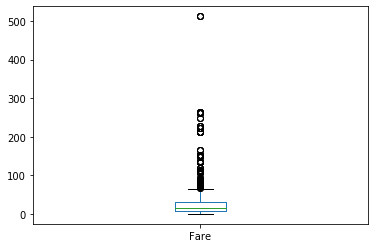

In [20]:
data_train_test.Fare.plot('box')

In [22]:
data_train_test.Sex.count()

1309

In [23]:
data_train_test.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [24]:
data_train_test.Sex.value_counts(normalize = True) # propoprtion instead of count

male      0.644003
female    0.355997
Name: Sex, dtype: float64

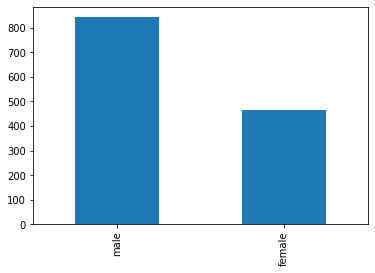

In [26]:
data_train_test.Sex.value_counts().plot('bar')

In [27]:
data_train_test[data_train_test.Survived != -999].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

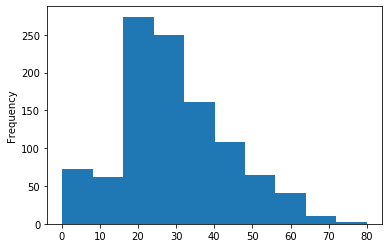

In [28]:
data_train_test.Age.plot(kind='hist')

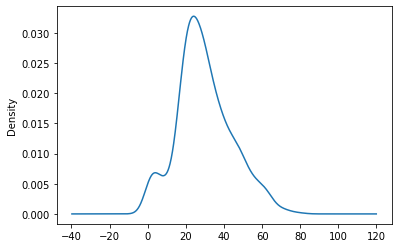

In [29]:
data_train_test.Age.plot(kind='kde')

In [30]:
data_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

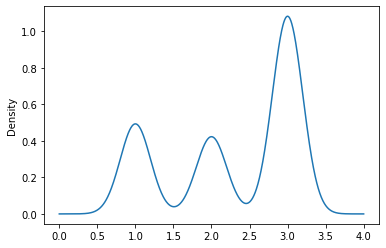

In [31]:
data_train_test.Pclass.plot(kind='kde');

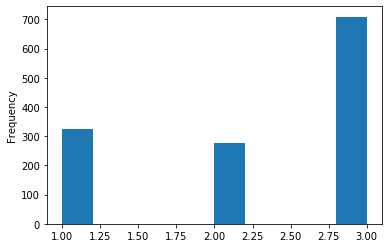

In [32]:
data_train_test.Pclass.plot(kind='hist');

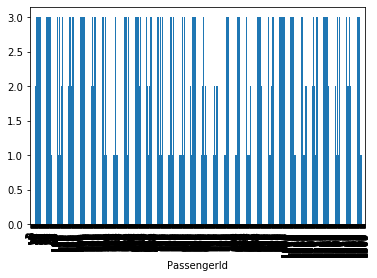

In [33]:
data_train_test.Pclass.plot(kind='bar');

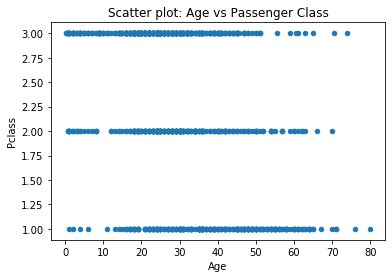

In [35]:
data_train_test.plot.scatter(x='Age', y='Pclass', title='Scatter plot: Age vs Passenger Class');

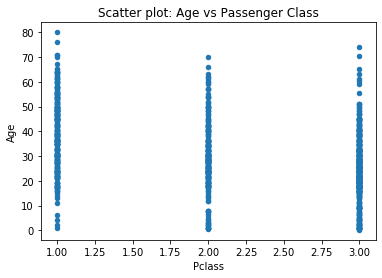

In [36]:
data_train_test.plot.scatter(x='Pclass', y='Age', title='Scatter plot: Age vs Passenger Class');

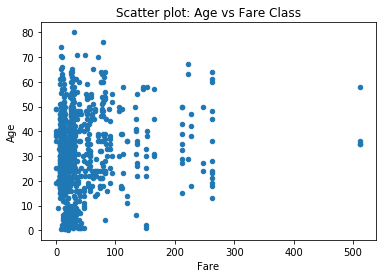

In [37]:
data_train_test.plot.scatter(x='Fare', y='Age', title='Scatter plot: Age vs Fare Class');

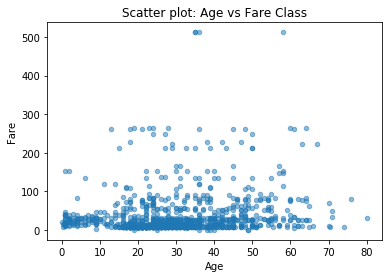

In [43]:
data_train_test.plot.scatter(x='Age', y='Fare', title='Scatter plot: Age vs Fare Class', alpha=0.5);

In [44]:
data_train_test.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [45]:
data_train_test.groupby(['Sex','Pclass']).agg({'Age':'mean'})

Age
Sex    Pclass           
female 1       37.037594
       2       27.499223
       3       22.185329
male   1       41.029272
       2       30.815380
       3       25.962264

In [46]:
col_01=data_train_test.groupby(['Sex','Pclass']).Age.mean()
col_02=data_train_test.groupby(['Sex','Pclass']).agg({'Age':'mean'})
print(type(col_01))
print(type(col_02))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [47]:
pd.crosstab(data_train_test.Sex,data_train_test.Pclass)# cross tab is fro categorical variables

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


In [48]:
pd.crosstab(data_train_test.Sex,data_train_test.Age)

Age,0.17,0.33,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,...,64.0,65.0,66.0,67.0,70.0,70.5,71.0,74.0,76.0,80.0
Sex,,,,,,,,,,,,,,,,,,,,,
female,1,0,0,0,2,0,1,5,7,3,...,2,0,0,0,0,0,0,0,1,0
male,0,1,1,1,1,3,1,5,5,4,...,3,3,1,1,2,1,2,1,0,1


In [50]:
data_train_test.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


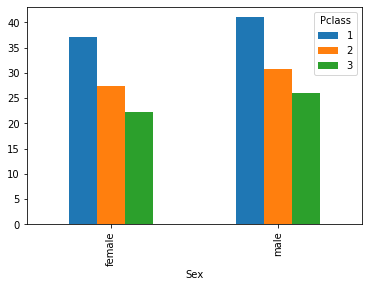

In [52]:
data_train_test.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean').plot(kind='bar')

Data Munging

In [53]:
data_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [57]:
# treating missing values of Embarked    
data_train_test[data_train_test['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [58]:
data_train_test['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [60]:
pd.crosstab(data_train_test.query("Survived != -999").Embarked, data_train_test.query("Survived != -999").Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [64]:
# find the different embarkment point and its corresponding fares
data_train_test.groupby(['Embarked','Pclass']).Fare.median()

Embarked  Pclass
C         1         76.7292
          2         15.3146
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         15.3750
          3          8.0500
Name: Fare, dtype: float64

In [65]:
data_train_test.query("Pclass == 1").groupby(['Embarked','Pclass']).Fare.median()

Embarked  Pclass
C         1         76.7292
Q         1         90.0000
S         1         52.0000
Name: Fare, dtype: float64

In [66]:
data_train_test.Embarked.fillna('C',inplace=True) # since the fare is 80.0 for both passengers and the median of fare is nearly 80.0 for C, filling C for the missing values

In [68]:
data_train_test[data_train_test.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [69]:
data_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [70]:
# filling Fare empty values
data_train_test[data_train_test.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-999,3701


In [80]:
data_train_test.query("Pclass == 3 and Embarked == 'S'").Fare.median()

8.05

In [81]:
median_fare=data_train_test.query("Pclass == 3 and Embarked == 'S'").Fare.median()

In [82]:
data_train_test.Fare.fillna(median_fare,inplace=True)

In [83]:
data_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [85]:
data_train_test[data_train_test.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
33,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,3,female,0,1,335677
37,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1,2677


In [88]:
data_train_test[data_train_test.Age.isnull()].groupby(['Sex','Pclass','Embarked']).Age.Median()

AttributeError: 'SeriesGroupBy' object has no attribute 'Median'

In [96]:
data_train_test.query("Age != 'nan'").groupby(['Sex','Pclass','Embarked']).Age.median()

Sex     Pclass  Embarked
female  1       C           38.00
                Q           35.00
                S           34.00
        2       C           23.00
                Q           30.00
                S           28.00
        3       C           15.00
                Q           22.00
                S           22.00
male    1       C           39.00
                Q           44.00
                S           42.00
        2       C           29.00
                Q           59.00
                S           29.00
        3       C           24.25
                Q           25.00
                S           25.00
Name: Age, dtype: float64

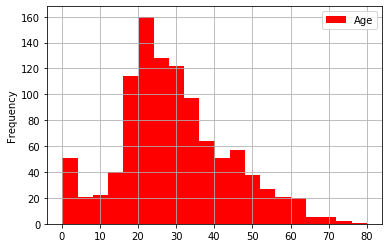

In [104]:
data_train_test.Age.plot(kind='hist', bins=20, color='r', grid=True, legend=True)

In [105]:
data_train_test.query("Age != 'nan'").groupby(['Sex']).Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

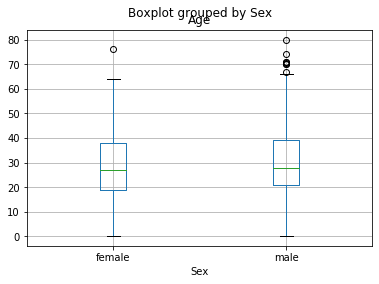

In [107]:
data_train_test.query("Age != 'nan'").boxplot('Age','Sex')

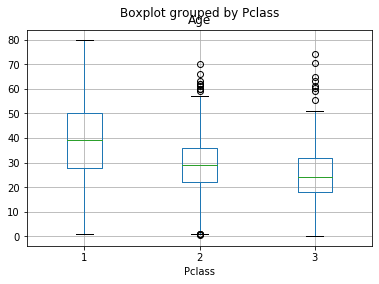

In [108]:
data_train_test.query("Age != 'nan'").boxplot('Age','Pclass')